<a href="https://colab.research.google.com/github/jihun5/jupyter_home/blob/main/1_5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8_%EC%A0%84%EC%B2%B4%EC%BD%94%EB%93%9C_%EB%B0%8F_%EC%9A%A9%EC%96%B4%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
dict_keys(['loss', 'accuracy'])


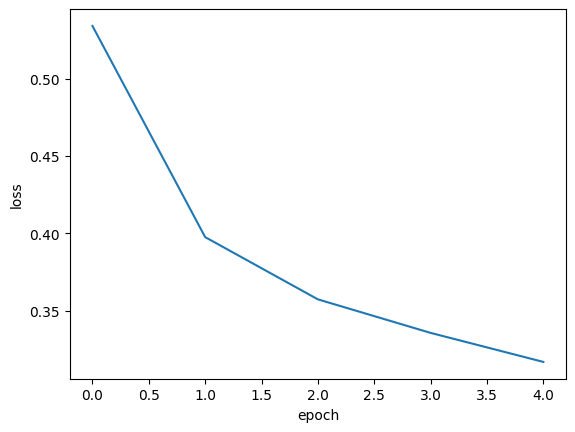

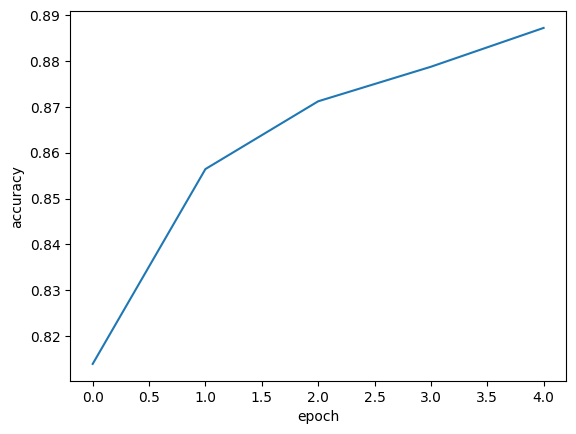

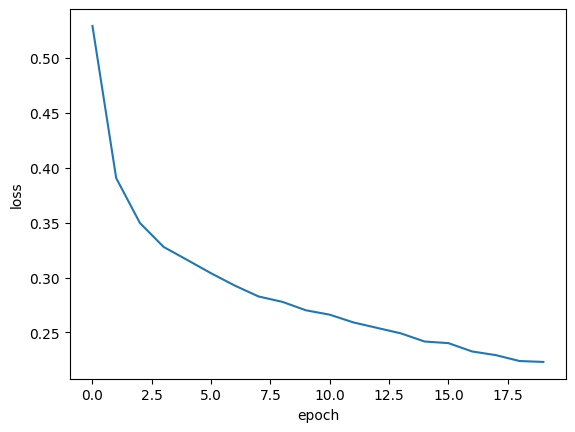

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
print(history.history.keys())

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


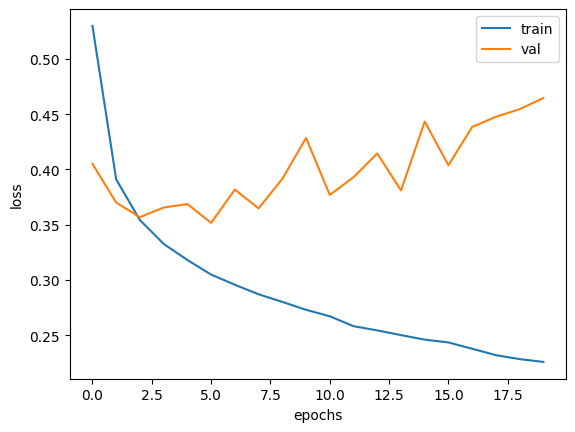

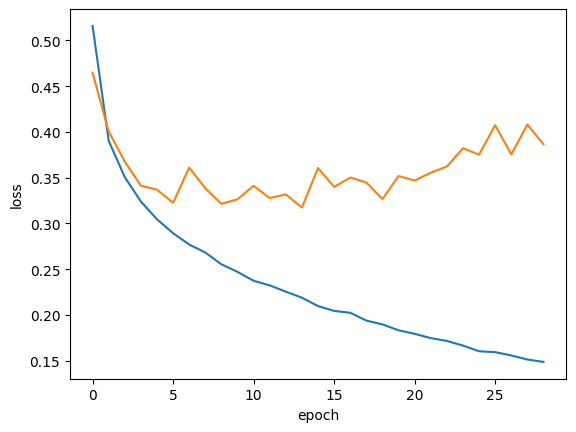

In [4]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=29, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


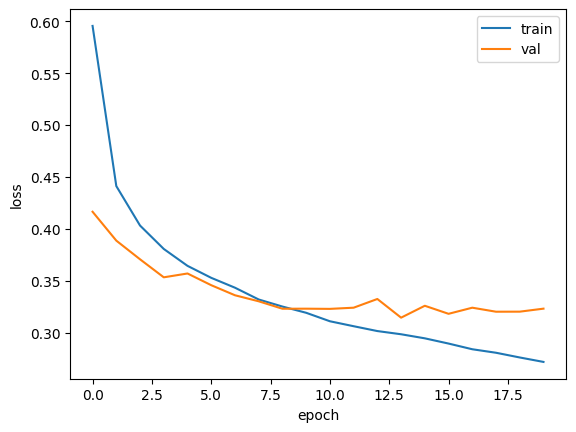

In [5]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [6]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
model.save_weights('model-weights.h5')
model.save('model-whole.h5')
!ls -al *.h5

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

import numpy as np

def accuracy_fn(model, x, y):
  labels = np.argmax(model.predict(x), axis=-1)
  return np.mean(labels == y)

accuracy_fn(model, val_scaled, val_target)

model = keras.models.load_model('model-whole.h5')
# accuracy_fn(model, val_scaled, val_target)
model.evaluate(val_scaled, val_target)

-rw-r--r-- 1 root root 333320 Sep 12 06:34 model-weights.h5
-rw-r--r-- 1 root root 981176 Sep 12 06:34 model-whole.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8774


[0.3359893560409546, 0.8774166703224182]

In [7]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
model = keras.models.load_model('best-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.8866


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5


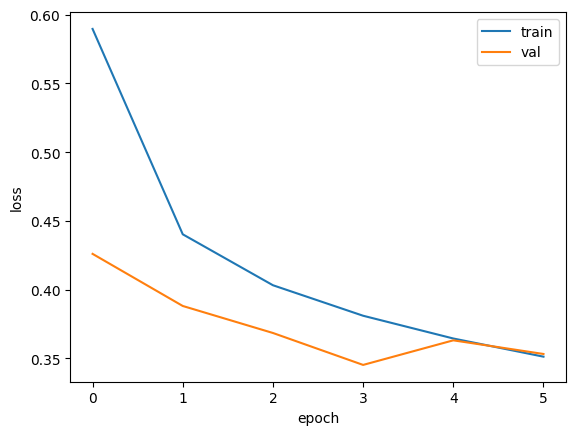

375/375 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8727


[0.3452865481376648, 0.8727499842643738]

In [8]:
# accuracy_fn(model, val_scaled, val_target)
model.evaluate(val_scaled, val_target)
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])
print(early_stopping_cb.stopped_epoch)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

model.evaluate(val_scaled, val_target)

드롭아웃은 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법이다.

콜백은 케라스 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구이다. 대표적으로 최상의 모델을 자동으로 저장해주거나, 검증 점수가 더이상 향상 되지 않으면 일찍 종료 할 수 있다.

조기 종료는 검증 점수가 더이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법이다.

Dropout은 드롭아웃 층입니다. 첫 번째 매개변수로 드롭아웃 할 비유을 지정한다. 드롭아웃 하지 않는 뉴런의 출력은1/(1-r)만큼 증가시켜 출력의 총합이 같도록 만든다.

sava_weights()는 모든 층의 가중치와 절편을 파일에 저장합니다. 첫번째 매개변수에 저장할 파일을 지정한다. save_format 매개변수에서 저장할 파일 포맷을 지정한다. 기본적으로 텐서플로의 checkpoint 포맷을 사용한다. 이 매개변수를 'h5로 지정하거나 파일의 확장자가 '.h5'이면 HDF5 포맷으로 저장이된다.

load-weights()는 모든 층의 가중치와 절편을 파일에 읽습니다. 첫번째 매개변수에 읽을 파일을 지정한다.

save()는 모델 구조와 모든 가중치와 절편을 파일에 지정한다.
첫번째 매개변수에 저장할 파이을 지정한다. save_format 매개변수에서 저장할 파일 포맷을 지정한다. 기본적으로 텐서플로의 savedModel 포멧을 사용한다. 이 매개변수를 'h5'로 지정하거나 파일의 확장자가 'h5'이면 HDF5 포맷으로 저장이된다.

load_model()은 model.save()로 저장된 모델을 로드한다. 첫번째 매개변수에 읽을 파일을 지정한다.

ModelCheckpoint는 케라스 모델과 가중치를 일정 간격으로 저장한다. 첫 번째 매개변수에 저장할 파일을 지정한다. monitor 매개변수는 모니터링할 지표를 지정한다. 기본값은 val_loss로 검증 손실을 관찰한다. save_weights_only 매개변수의 기본값은 False로 전체 모델을 저장한다. True로 지정하면 모델의 가중치와 절편만 저장한다. save_best_only 매개변수를 True로 지정하면 가장 낮은 검증 점수를 만드는 모델을 저장한다.

EarlyStopping은 관심 지표가 더이상 향상하지 않으면 훈련을 중지한다. monitor 매개변수는 모니터링할 지표를 지정한다. 기본값은 val_loss로 검증 손실을 고나찰한다. patience 매개변수에 모델이 더이상 향상되지 않고 지속할 수 있는 최대 에포크 횟수를 지정한다. restore-best_weights 매개변수에 최상의 모델 가중치를 복원할지를 지정한다.

Numpy - argmax는 배열에서 축을 따라 최대값의 인덱스를 반환한다.
axis 매개변수에서 어떤 축을 따라 최대값을 찾을 지 지정한다. 기본값은 None으로 전체 배열에서 최대값을 찾는다.